# Grafos e Redes Sociais

## Introdução

#### Instalar pacote

In [1]:
# Install on MacOS Terminal:

# /usr/bin/ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install)"
# brew install pkg-config
# brew install cairo
# brew install py2cairo
# brew install igraph
# sudo pip install python-igraph

# for show plot function follow this steps https://github.com/igraph/python-igraph/commit/abb4a67b24b9ee8efcfb1629cc6c58358cc306c2
# for show labels in plot function follow this steps https://stackoverflow.com/questions/30640489/issue-plotting-vertex-labels-using-igraph-in-ipython

#### Criar grafos

IGRAPH D--- 4 4 --
+ attr: label (v)
+ edges:
0->1 1->2 2->3 3->0


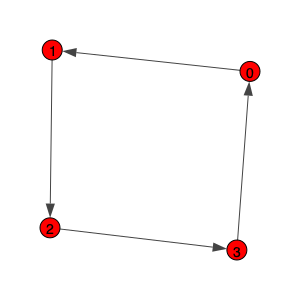

In [2]:
from igraph import Graph
from igraph import plot
import matplotlib.pyplot as plt

grafo = Graph(edges = [(0,1), (1,2), (2,3), (3,0)], # arestas
              directed = True) # declarar como grafo direcionado
grafo.vs['label'] = range(grafo.vcount())

print(grafo)
plot(grafo, bbox = (300, 300), margin = 50)

IGRAPH D--- 4 8 --
+ attr: label (v)
+ edges:
0->1 1->2 2->3 3->0 0->3 3->2 2->1 1->0


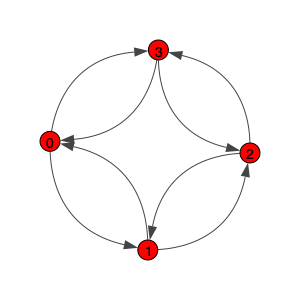

In [3]:
grafo = Graph(edges = [(0,1), (1,2), (2,3), (3,0),(0,3),(3,2),(2,1),(1,0)], directed = True)
grafo.vs['label'] = range(grafo.vcount())

print(grafo)
plot(grafo, bbox = (300, 300), margin = 50)

#### Criar grafo de autorelacionamento

IGRAPH D--- 4 5 --
+ attr: label (v)
+ edges:
0->1 1->2 2->3 3->0 1->1


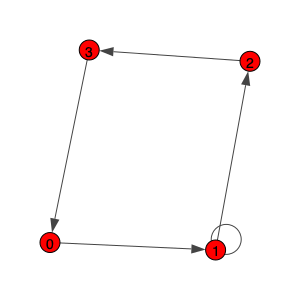

In [4]:
grafo = Graph(edges = [(0,1), (1,2), (2,3), (3,0),(1,1)], directed = True)
grafo.vs['label'] = range(grafo.vcount())

print(grafo)
plot(grafo, bbox = (300, 300), margin = 50)

#### Criar grafo com vértice desconexo

IGRAPH DN-- 5 4 --
+ attr: label (v), name (v)
+ edges (vertex names):
0->1, 1->2, 2->3, 3->0


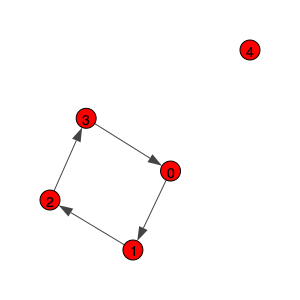

In [5]:
grafo = Graph(edges = [(0,1), (1,2), (2,3), (3,0)], directed = True)
grafo.add_vertex(5)
grafo.vs['label'] = range(grafo.vcount())
grafo.vs['name'] = grafo.vs['label']

print(grafo)
plot(grafo, bbox = (300, 300), margin = 50)

IGRAPH D--- 4 4 --
+ attr: label (v)
+ edges:
0->1 2->2 2->3 3->0


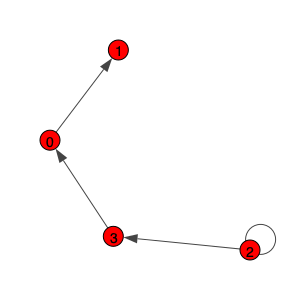

In [6]:
grafo = Graph(edges = [(0,1), (2,2), (2,3), (3,0)], directed = True)
grafo.vs['label'] = range(grafo.vcount())

print(grafo)
plot(grafo, bbox = (300, 300), margin = 50)

#### Criar grafo não direcional

IGRAPH U--- 4 4 --
+ attr: label (v)
+ edges:
0--1 2--2 2--3 0--3


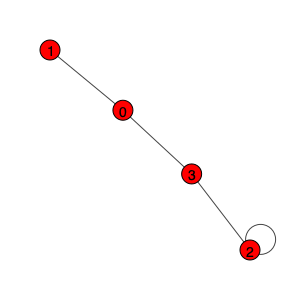

In [7]:
grafo = Graph(edges = [(0,1), (2,2), (2,3), (3,0)], directed = False)
grafo.vs['label'] = range(grafo.vcount())

print(grafo)
plot(grafo, bbox = (300, 300), margin = 50)

#### Criar grafo via parâmetros

IGRAPH U--- 10 4 --
+ attr: label (v)
+ edges:
0--1 2--2 2--3 0--3


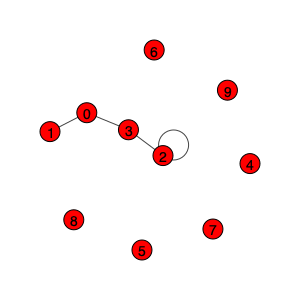

In [8]:
grafo = Graph(directed = False)
grafo.add_vertices(10)
grafo.add_edges([(0,1), (2,2), (2,3), (3,0)])
grafo.vs['label'] = range(grafo.vcount())

print(grafo)
plot(grafo, bbox = (300, 300), margin = 50)

#### Criar grafo com labels não numéricas

IGRAPH UN-- 7 7 --
+ attr: label (v), name (v)
+ edges (vertex names):
A--B, B--C, C--D, D--E, A--E, A--C, B--C


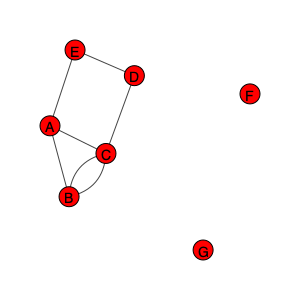

In [9]:
from string import ascii_uppercase

grafo = Graph(directed = False)
grafo.add_vertices(5)
grafo.add_edges([(0,1), (1,2), (2,3), (3,4), (4,0), (0,2), (2,1)])
grafo.add_vertex(5)
grafo.add_vertex(6)
grafo.vs['name'] = [ascii_uppercase[i] for i in range(grafo.vcount())]
grafo.vs['label'] = grafo.vs['name']

print(grafo)
plot(grafo, bbox = (300, 300), margin = 50)

#### Gerar matriz de adjacência

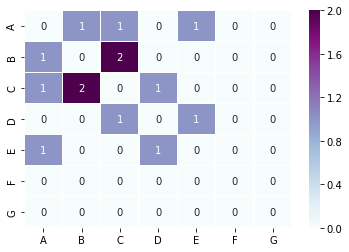

In [10]:
import pandas as pd
import seaborn as sns

adjacencia = grafo.get_adjacency()

df_adj = pd.DataFrame(adjacencia, index = grafo.vs['name'], columns = grafo.vs['name'])

ax = sns.heatmap(df_adj, annot = True, linewidths = 0.5, cmap = 'BuPu', fmt='g')
plt.show()

#### Criar uma rede social

IGRAPH DNWT 4 4 -- Amizades
+ attr: name (g), label (v), name (v), peso (v), type (v), TipoAmizade (e),
  weight (e)
+ edges (vertex names):
Fernando->Pedro, Jose->Antonio, Fernando->Jose, Fernando->Antonio


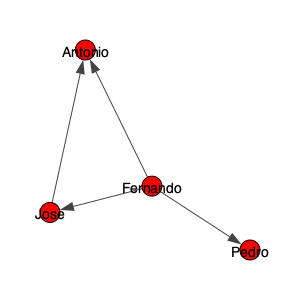

In [11]:
grafo = Graph(edges = [(0,1), (2,3), (0,2), (0,3)], directed = True)
grafo.vs['name'] = ['Fernando', 'Pedro', 'Jose', 'Antonio']
grafo.vs['peso'] = [40, 30, 30, 25]
grafo.es['TipoAmizade'] = ['Amigo', 'Inimigo', 'Inimigo', 'Amigo']
grafo.es['weight'] = [1, 2, 4, 3]
grafo.vs['type'] = 'Humanos'
grafo.vs['label'] = grafo.vs['name']
grafo['name'] = 'Amizades'

print(grafo)
plot(grafo, bbox = (300, 300), margin = 50)

## Impressão

#### Definir cores dos vértices

In [12]:
grafo.vs['color'] = ['blue', 'red', 'yellow', 'green']

#### Visualizar propriedades das vértices

In [13]:
for v in grafo.vs:
    print(v)

igraph.Vertex(<igraph.Graph object at 0x1228cf6d8>, 0, {'name': 'Fernando', 'peso': 40, 'type': 'Humanos', 'label': 'Fernando', 'color': 'blue'})
igraph.Vertex(<igraph.Graph object at 0x1228cf6d8>, 1, {'name': 'Pedro', 'peso': 30, 'type': 'Humanos', 'label': 'Pedro', 'color': 'red'})
igraph.Vertex(<igraph.Graph object at 0x1228cf6d8>, 2, {'name': 'Jose', 'peso': 30, 'type': 'Humanos', 'label': 'Jose', 'color': 'yellow'})
igraph.Vertex(<igraph.Graph object at 0x1228cf6d8>, 3, {'name': 'Antonio', 'peso': 25, 'type': 'Humanos', 'label': 'Antonio', 'color': 'green'})


#### Visualizar propriedades das arestas

In [14]:
for e in grafo.es:
    print(e)

igraph.Edge(<igraph.Graph object at 0x1228cf6d8>, 0, {'TipoAmizade': 'Amigo', 'weight': 1})
igraph.Edge(<igraph.Graph object at 0x1228cf6d8>, 1, {'TipoAmizade': 'Inimigo', 'weight': 2})
igraph.Edge(<igraph.Graph object at 0x1228cf6d8>, 2, {'TipoAmizade': 'Inimigo', 'weight': 4})
igraph.Edge(<igraph.Graph object at 0x1228cf6d8>, 3, {'TipoAmizade': 'Amigo', 'weight': 3})


#### Plotar com atributos

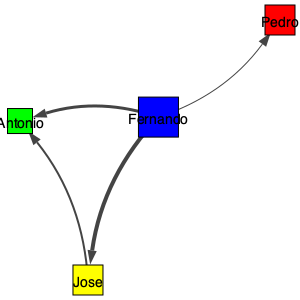

In [15]:
plot(grafo, bbox = (300, 300), vertex_size = grafo.vs['peso'], # tamanho do vértice
     edge_width = grafo.es['weight'], # espessura da aresta
     edge_curved = 0.2, # curvatura da aresta
     vertex_shape = 'square') # altera a forma do vértice para quadrado

## Métricas

#### Carregar grafo via arquivo

IGRAPH D-W- 53 179 --
+ attr: Handicapped (v), Lokationposition1highest53lowest (v), Repeater (v),
  Sweetsgiver (v), b (v), g (v), id (v), label (v), r (v), size (v), x (v), y
  (v), Edge Label (e), id (e), weight (e)
+ edges:
 0 ->  3  4 36                              29 ->  0 13 45 49
 1 -> 14 24 50                              30 -> 13 14 23 29 40
 2 ->  1  3  8 15 35                        31 -> 35
 3 ->  9 13 22 35 45 48                     32 -> 21 26
 4 ->  0  5 13 23                           33 ->
 5 ->  1  3  4 13                           34 ->  4
 6 -> 10 15                                 35 ->  6 10 22 23 28 31 44 46 49
 7 ->                                       36 -> 10 49
 8 -> 40 49                                 37 ->  0  2 10 14 16 17 22 24 35
38 40 48
 9 ->  3                                    38 -> 22 32 36
10 ->  6  8 13 14 27                        39 ->
11 -> 43                                    40 ->  8 12 20 23 50
12 -> 40                                

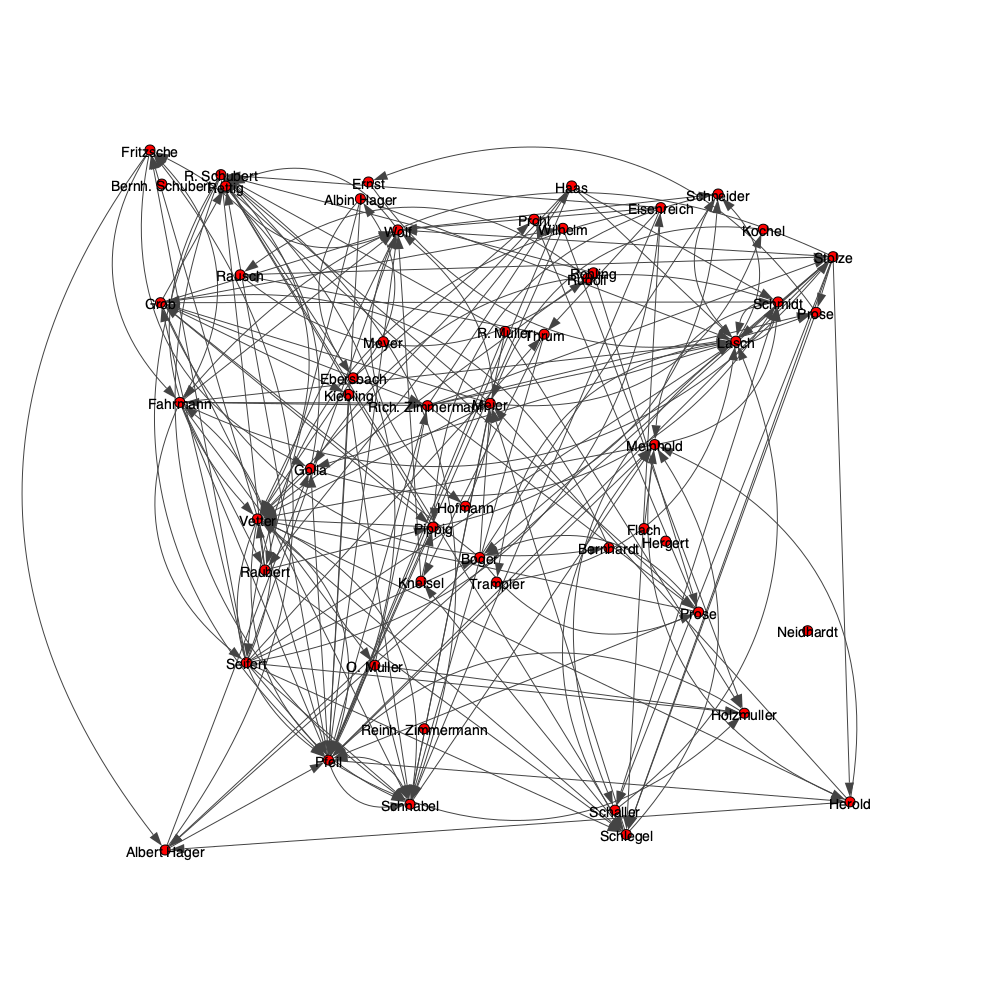

In [16]:
from igraph import load

grafo_l = load('Grafos e Redes Sociais/Grafo.graphml')

print(grafo_l)
plot(grafo_l, bbox= (1000, 1000), margin = 150)

#### Visualizar métricas dos vértices

In [17]:
df_grafo = pd.DataFrame(zip(grafo_l.vs['label'], grafo_l.degree(type = 'all'), grafo_l.degree(type = 'in'), grafo_l.degree(type = 'out'), grafo_l.neighborhood()), columns = ['Nome', 'Conexões', 'Seguidores', 'Seguindo', 'Vizinhança'])

display(df_grafo)

/Users/igorjuliopimenta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: type=... keyword argument is deprecated since igraph 0.6, use mode=... instead
  """Entry point for launching an IPython kernel.


,Nome,Conexões,Seguidores,Seguindo,Vizinhança
0,Schlegel,11,8,3,"[0, 3, 4, 13, 17, 21, 29, 36, 37, 43, 45]"
1,Albert Hager,7,4,3,"[1, 2, 5, 14, 21, 24, 50]"
2,Boger,8,3,5,"[2, 1, 3, 8, 15, 21, 35, 37]"
3,Meier,10,4,6,"[3, 0, 2, 5, 9, 13, 22, 35, 45, 48]"
4,Meinhold,10,6,4,"[4, 0, 5, 13, 14, 22, 23, 34]"
5,Herold,7,3,4,"[5, 1, 3, 4, 13, 14, 21]"
6,Rettig,5,3,2,"[6, 10, 14, 15, 35]"
7,Meyer,0,0,0,[7]
8,Schneider,6,4,2,"[8, 2, 10, 40, 49]"
9,Kochel,2,1,1,"[9, 3]"


#### Verificar isometria entre grafos

In [18]:
grafo = grafo_l

print(grafo_l.isomorphic(grafo))

True


## Caminhos e distâncias

#### Criar grafo

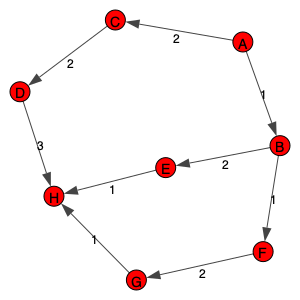

In [19]:
grafo = Graph(edges = [(0,2), (0,1), (1,4), (1,5), (2,3), (6,7), (3,7), (4,7), (5,6)], directed = True)

grafo.vs['name'] = [ascii_uppercase[i] for i in range(grafo.vcount())]
grafo.vs['label'] = grafo.vs['name']
grafo.es['weight'] = [2, 1, 2, 1, 2, 1, 3, 1]

plot(grafo, bbox = (300,300), edge_label = grafo.es['weight'])

#### Gerar a menor distância entre os vértices

In [20]:
from itertools import chain

lst_melhor_caminho = []

for i in range(grafo.vcount()):
    for j in range(grafo.vcount()):
        if i != j:
            lst_melhor_caminho.append(list((grafo.vs['name'][i],
                                            grafo.vs['name'][j],
                                            grafo.vs[list(chain.from_iterable(grafo.get_shortest_paths(i, j, output = 'vpath')))]['name'],
                                            [i.index for i in list(grafo.es[chain.from_iterable(grafo.get_shortest_paths(i, j, output = 'epath'))])],
                                            list(grafo.es[chain.from_iterable(grafo.get_shortest_paths(i, j, output = 'epath'))]['weight']),
                                            sum(grafo.es[chain.from_iterable(grafo.get_shortest_paths(i, j, output = 'epath'))]['weight']))))

df_melhor_caminho = pd.DataFrame(lst_melhor_caminho, columns = ['in', 'out', 'vértices', 'arestas', 'distância arestas', 'distância percorrida'])
display(df_melhor_caminho)

/Users/igorjuliopimenta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Couldn't reach some vertices at structural_properties.c:740
  # Remove the CWD from sys.path while we load stuff.
/Users/igorjuliopimenta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Couldn't reach some vertices at structural_properties.c:740
  # This is added back by InteractiveShellApp.init_path()
/Users/igorjuliopimenta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Couldn't reach some vertices at structural_properties.c:740
  if sys.path[0] == '':
/Users/igorjuliopimenta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Couldn't reach some vertices at structural_properties.c:740
  del sys.path[0]


,in,out,vértices,arestas,distância arestas,distância percorrida
0,A,B,"[A, B]",[1],[1],1
1,A,C,"[A, C]",[0],[2],2
2,A,D,"[A, C, D]","[0, 4]","[2, 2]",4
3,A,E,"[A, B, E]","[1, 2]","[1, 2]",3
4,A,F,"[A, B, F]","[1, 3]","[1, 1]",2
5,A,G,"[A, B, F, G]","[1, 3, 8]","[1, 1, 2]",4
6,A,H,"[A, B, E, H]","[1, 2, 7]","[1, 2, 1]",4
7,B,A,[],[],[],0
8,B,C,[],[],[],0
9,B,D,[],[],[],0


#### Pintar vértices percorridos

,in,out,vértices,arestas,distância arestas,distância percorrida
6,A,H,"[A, B, E, H]","[1, 2, 7]","[1, 2, 1]",4


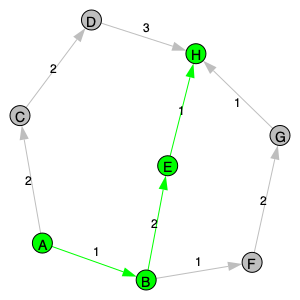

In [21]:
color = []

for v in grafo.vs:
    if v['name'] in df_melhor_caminho.iloc[6, 2]:
        v['color'] = 'green'
    else:
        v['color'] = 'gray'
    
for e in grafo.es:
    if e.index in df_melhor_caminho.iloc[6, 3]:
        e['color'] = 'green'
    else:
        e['color'] = 'gray'
        
display(df_melhor_caminho[df_melhor_caminho.index == 6])

plot(grafo, bbox = (300,300), edge_label = grafo.es['weight'])

## Comunidades

#### Criar clusters

In [22]:
clusters = grafo_l.clusters()

print(clusters)

Clustering with 53 elements and 11 clusters
[ 0] 51, 52
[ 1] 47
[ 2] 42
[ 3] 39
[ 4] 34
[ 5] 33
[ 6] 25
[ 7] 19
[ 8] 7
[ 9] 0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22,
     23, 24, 26, 27, 28, 29, 30, 31, 32, 35, 36, 37, 38, 40, 41, 43, 44, 45,
     46, 48, 49, 50
[10] 18


#### Vincular clusters aos vértices

In [23]:
df_grafo['Cluster'] = clusters.membership

display(df_grafo)

,Nome,Conexões,Seguidores,Seguindo,Vizinhança,Cluster
0,Schlegel,11,8,3,"[0, 3, 4, 13, 17, 21, 29, 36, 37, 43, 45]",9
1,Albert Hager,7,4,3,"[1, 2, 5, 14, 21, 24, 50]",9
2,Boger,8,3,5,"[2, 1, 3, 8, 15, 21, 35, 37]",9
3,Meier,10,4,6,"[3, 0, 2, 5, 9, 13, 22, 35, 45, 48]",9
4,Meinhold,10,6,4,"[4, 0, 5, 13, 14, 22, 23, 34]",9
5,Herold,7,3,4,"[5, 1, 3, 4, 13, 14, 21]",9
6,Rettig,5,3,2,"[6, 10, 14, 15, 35]",9
7,Meyer,0,0,0,[7],8
8,Schneider,6,4,2,"[8, 2, 10, 40, 49]",9
9,Kochel,2,1,1,"[9, 3]",9


#### Pintar vértice de acordo com o cluster pertencente

/Users/igorjuliopimenta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


IGRAPH D-W- 53 179 --
+ attr: Handicapped (v), Lokationposition1highest53lowest (v), Repeater (v),
  Sweetsgiver (v), b (v), color (v), g (v), id (v), label (v), r (v), size
  (v), x (v), y (v), Edge Label (e), id (e), weight (e)
+ edges:
 0 ->  3  4 36                              29 ->  0 13 45 49
 1 -> 14 24 50                              30 -> 13 14 23 29 40
 2 ->  1  3  8 15 35                        31 -> 35
 3 ->  9 13 22 35 45 48                     32 -> 21 26
 4 ->  0  5 13 23                           33 ->
 5 ->  1  3  4 13                           34 ->  4
 6 -> 10 15                                 35 ->  6 10 22 23 28 31 44 46 49
 7 ->                                       36 -> 10 49
 8 -> 40 49                                 37 ->  0  2 10 14 16 17 22 24 35
38 40 48
 9 ->  3                                    38 -> 22 32 36
10 ->  6  8 13 14 27                        39 ->
11 -> 43                                    40 ->  8 12 20 23 50
12 -> 40                     

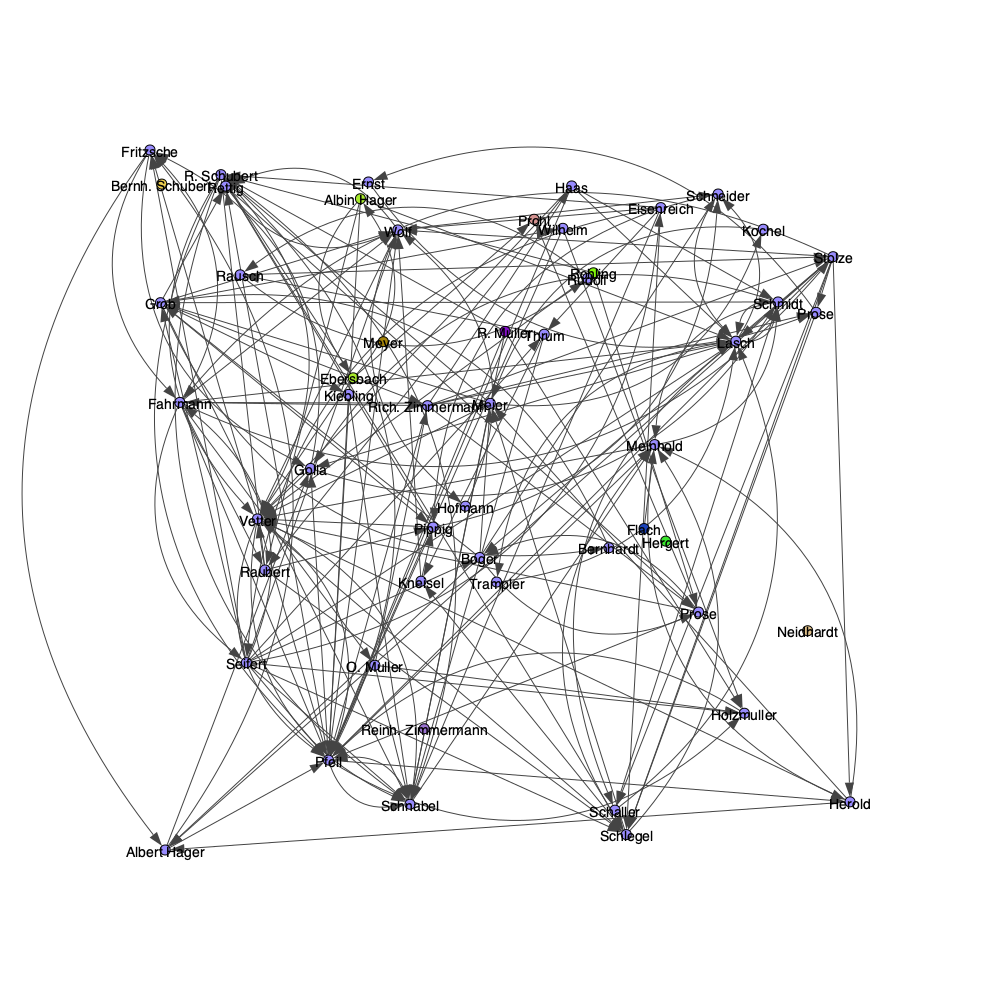

In [24]:
import random
import numpy as np

r = lambda: random.randint(0,255)
df_grafo['Cor'] = 0

for i in np.unique(df_grafo['Cluster']):
    df_grafo['Cor'][df_grafo['Cluster'] == i] = [('#%02X%02X%02X' % (r(),r(),r()))]
    
grafo_l.vs['color'] = df_grafo['Cor']

print(grafo_l)
plot(grafo_l, bbox= (1000, 1000), margin = 150)

#### Gerar clusters do grafo simples

In [25]:
clusters = grafo.clusters()

print(clusters)

Clustering with 8 elements and 8 clusters
[0] A
[1] C
[2] D
[3] B
[4] F
[5] G
[6] E
[7] H


#### Gerar dendrograma (Agrupamento hierárquico)

In [26]:
dendrograma = grafo.community_edge_betweenness()

print(dendrograma)

Dendrogram, 8 elements, 7 merges

7 4 3 6 5 1 2 0
| | | | | | | |
`-' | | | | | |
 |  | | | | | |
 `--' | | | | |
  |   | | | | |
  `---' `-' `-'
    |    |   | 
    `----'   | 
      |      | 
      `------'


#### Gerar clusters atravéz do dendrograma

In [27]:
print(dendrograma.optimal_count, 'clusters')

cluster = dendrograma.as_clustering()

print(cluster, '\n\n', cluster.membership)

3 clusters
Clustering with 8 elements and 3 clusters
[0] A, C
[1] B, F
[2] D, E, G, H 

 [0, 1, 0, 2, 2, 1, 2, 2]


#### Gerar cliques do grafo importado

In [28]:
cliques = grafo_l.as_undirected().cliques(min = 4)

display('%d cliques.' % len(cliques), cliques)

'17 cliques.'

[(0, 3, 13, 45),
 (0, 13, 29, 45),
 (1, 5, 14, 21),
 (1, 14, 24, 50),
 (3, 13, 22, 45),
 (4, 5, 13, 14),
 (4, 13, 14, 22),
 (10, 14, 21, 48),
 (10, 14, 37, 48),
 (13, 14, 22, 45),
 (13, 14, 45, 49),
 (13, 29, 45, 49),
 (14, 21, 44, 48),
 (14, 22, 42, 45),
 (14, 24, 37, 48),
 (17, 22, 37, 38),
 (21, 40, 44, 48)]